In [14]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True

In [15]:
#drugNameList = ['Acetaminophen', 'Amoxicillin', 'Aspirin', 'Dimethyl fumarate', 'Sertraline', 
#                 'Pantoprazole', 'Amlodipine', 'Metformin', 'Omeprazole','Gabapentin', 'Losartan', 'Ibuprofen', 'Meloxicam', 'Lorazepam']
drugName = 'Amoxicillin'
Smile_result = pcp.get_compounds(drugName, 'name')
#print(len(Smile_result))
c_id = Smile_result[0].cid
mol = Smile_result[0].from_cid(c_id)
formula = mol.molecular_formula

#### https://pubchempy.readthedocs.io/en/latest/api.html ####
isomeric_smiles = Smile_result[0].isomeric_smiles
canonical_smiles = Smile_result[0].canonical_smiles

In [16]:
print('Drug Name:',drugName)
print('Chemical Formula:', formula)
print('\nIsomeric SMILES:\n',isomeric_smiles)
print('\nCanonical SMILES:\n',canonical_smiles) 

Drug Name: Amoxicillin
Chemical Formula: C16H19N3O5S

Isomeric SMILES:
 CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H](C3=CC=C(C=C3)O)N)C(=O)O)C

Canonical SMILES:
 CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C


In [17]:
# molecule = Chem.MolFromSmiles(isomeric_smiles)
molecule = Chem.MolFromSmiles(canonical_smiles)

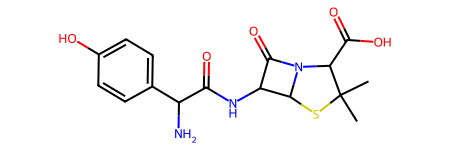

In [18]:
molecule

In [19]:
# add Hydrogens so that we get a reasonable conformer
molecule = Chem.AddHs(molecule)
rdDistGeom.EmbedMolecule(molecule)

0

In [20]:
# generate 10 conformers
rdDistGeom.EmbedMultipleConfs(molecule,10, randomSeed=0xf00d) 
print(molecule.GetNumConformers(),molecule.GetConformer().Is3D())

10 True


In [21]:
# Show 3D image & Info
print("\nDrug Name:                 ", drugName)
print("Drug Formula:              ", formula) 
print("Isomeric SMILES:           ", isomeric_smiles)
print("Canonical SMILES:          ", canonical_smiles, "\n")
IPythonConsole.drawMol3D(molecule)
print("\n")


Drug Name:                  Amoxicillin
Drug Formula:               C16H19N3O5S
Isomeric SMILES:            CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H](C3=CC=C(C=C3)O)N)C(=O)O)C
Canonical SMILES:           CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C 



3Dmol.js failed to load for some reason. Please check your browser console for error messages.